In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_decision_forests as tfdf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-property-model/sample_submission.csv
/kaggle/input/housing-property-model/data_description.txt
/kaggle/input/housing-property-model/train.csv
/kaggle/input/housing-property-model/test.csv


In [41]:
print("Tensorflow v" +tf.__version__)
print("Tensorflow_decision_forests"+tfdf.__version__)

Tensorflow v2.15.0
Tensorflow_decision_forests1.8.1


In [42]:
train_file_path="/kaggle/input/housing-property-model/train.csv"
dataset_df=pd.read_csv(train_file_path)
print("shape::",dataset_df.shape)

shape:: (1460, 81)


In [43]:
dataset_df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [75]:
ataset_df=dataset_df.pop('Id')

In [76]:
dataset_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [77]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 900x800 with 0 Axes>

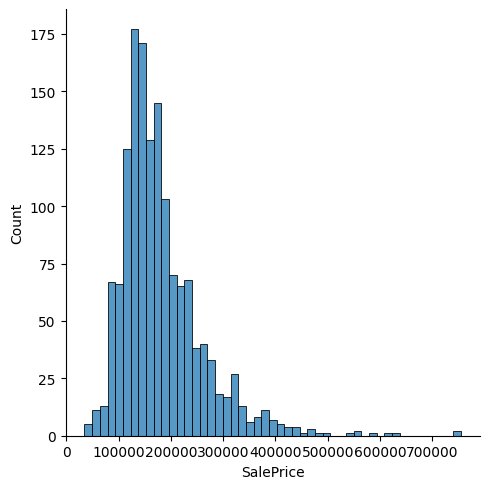

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.displot(dataset_df['SalePrice'])


In [79]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [80]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


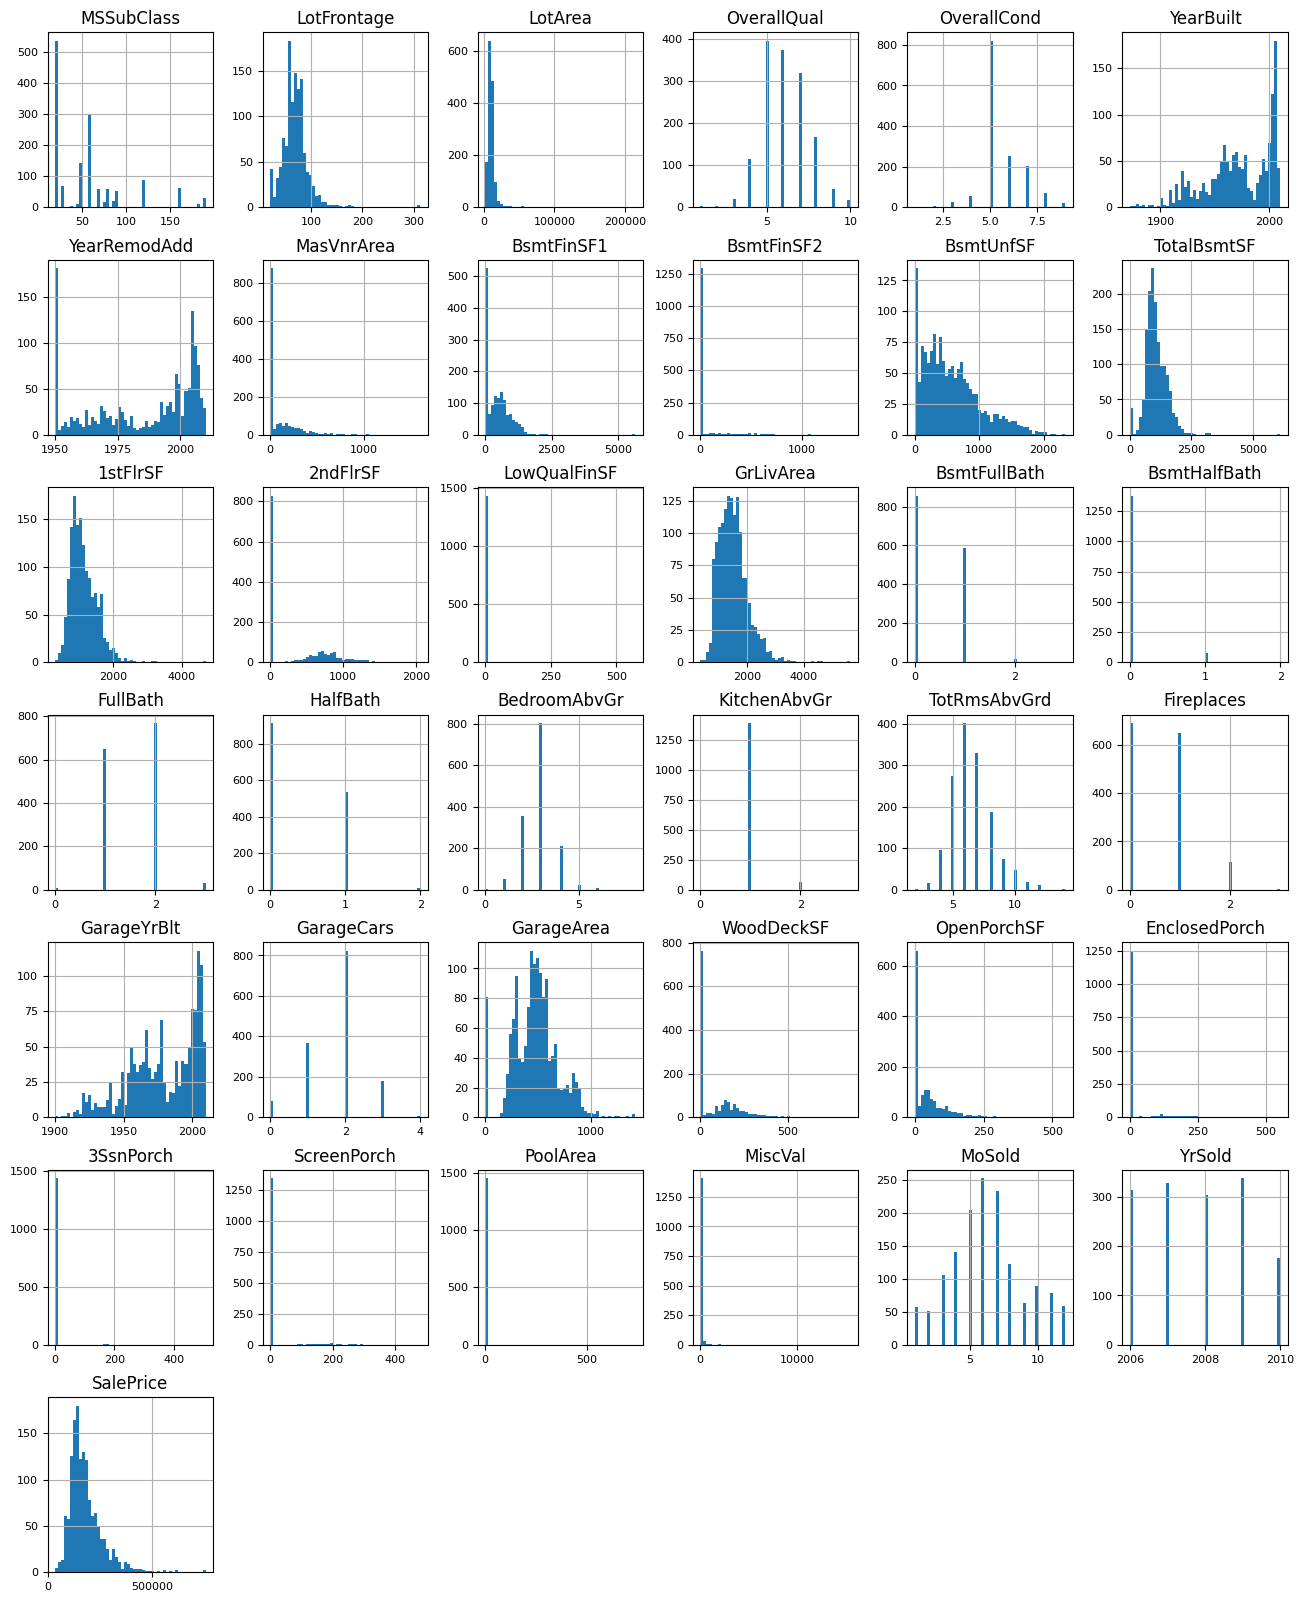

In [81]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [82]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1055 examples in training, 405 examples in testing.


In [83]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [84]:
label='SalePrice'
train_ds=tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd,label=label, task=tfdf.keras.Task.REGRESSION)
test_ds=tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd,label=label, task=tfdf.keras.Task.REGRESSION)
#all the data is ready in the tensorflow format from pandas format

In [85]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [86]:
rf=tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION) #rf=random forest model name

Use /tmp/tmpg96084of as temporary training directory


In [87]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.120746. Found 1055 examples.
Training model...


[INFO 24-08-18 19:58:38.0386 UTC kernel.cc:1233] Loading model from path /tmp/tmpg96084of/model/ with prefix 5dbe2dd543624d6e


Model trained in 0:00:02.093994
Compiling model...


[INFO 24-08-18 19:58:38.3948 UTC decision_forest.cc:660] Model loaded with 300 root(s), 100616 node(s), and 75 input feature(s).
[INFO 24-08-18 19:58:38.3948 UTC abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-08-18 19:58:38.3949 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [88]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=5)

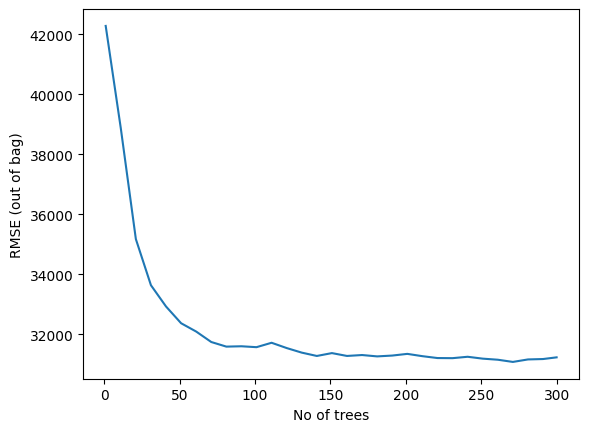

In [89]:
logs=rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],[log.evaluation.rmse for log in logs])
plt.xlabel("No of trees")
plt.ylabel("RMSE (out of bag)")
plt.show()

In [90]:
#to check model accuracy on traning data
inspect=rf.make_inspector()
inspect.evaluation()

Evaluation(num_examples=1055, accuracy=None, loss=None, rmse=31226.788664914107, ndcg=None, aucs=None, auuc=None, qini=None)

In [91]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 386ms/step - loss: 0.0000e+00
loss: 0.0000


In [93]:
test_file_path="/kaggle/input/housing-property-model/test.csv"
test_data=pd.read_csv(test_file_path)
#test_data.head(15)

ids=test_data.pop('Id')
#test_data.head(15)
test_ds=tfdf.keras.pd_dataframe_to_tf_dataset(test_data,task=tfdf.keras.Task.REGRESSION)
preds=rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})
output.head()

2/2 [==============================] - 1s 24ms/step


,Id,SalePrice
0,1461,125268.296875
1,1462,153747.609375
2,1463,179350.296875
3,1464,180596.500000
4,1465,195961.562500


In [96]:
sample_submission_df = pd.read_csv('/kaggle/input/housing-property-model/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head(45)

2/2 [==============================] - 0s 24ms/step


,Id,SalePrice
0,1461,125268.296875
1,1462,153747.609375
2,1463,179350.296875
3,1464,180596.500000
4,1465,195961.562500
5,1466,181451.968750
6,1467,167247.890625
7,1468,174378.500000
8,1469,174731.625000
9,1470,129012.195312
